## Why you should care


The ideas of probability theory are used in the computational methods you'll use in your research to try and extract information from data. Or to try and model certain phenomenua. Here, we'll talk some about coin flips or rolling dice, but these are just simplier abstractions that help us grapple with the ideas of probability theory. Coin flips for instance, can be an abstract analog of a neuron spiking or not. 

## Probabilities from counting

The simplest way to start thinking of probabilities is imagining that all of the things we want to know the probabilties of occur with equal frequency. In this case, we can compute a probabiltiy of a thing happening by dividing how many times that thing happened by the total amount of experiments or outcomes. 

For example, if you flip a coin 105 times, and observe that 46 of the 105 times the coin landed on a heads, then the probability of heads can be defined as $\frac{46}{105}$, (or a 43.8 % chance of heads)

Let's talk about certain ideas that are important for computing probabilities. The first is the **sample space** this is the **set of all possible outcomes**

<div>
<img src="images/sample_space.png" width="400"/>
</div>


**Events** : in the diagram above, these are A and B

* example: A can be "Heads in 10 tosses", while B could be "Tails in 10 tosses"

**Outcomes** : in the diagram above, these are the individual elipses

## Probabilities with probabilities


We can't always assume that all outcomes appear with equal chance. When we can't, we have to define probability in a different manner. We say probability in reference to some specific number, but to get there we have to use additonal concepts. These are:

* **sample space**

* **probability function**

We’ve already talked about 1 to some extent above, so let's focus on 2. A probability function is just a regular function as you’re used to thinking of, that takes as inputs events in the sample space, and produces as outputs a real number between 0 and 1. The function has additional properties that need to be met. Usually, we won’t need to check these but they are helpful for intuition in an example you’ll soon encounter. These properties are: 

* Probability of nothing is 0
* Probability of everything is 1
* Disjoint events do not affect each other's probability 

Here’s an example for intuition. Probability behaves like mass, Imagine you have a pile of pebbles. 

* The mass of no pebbles is zero. 
* The mass of all the pebbles is 1. 
* If we have non-overlapping pebbles, we can get their combined mass by adding the individual masses together. 


## Random variables

Random variables are one of the most important concepts to understand when we’re using probability theory to describe things in the world. Sometimes random variables are summarized as “a variable that takes on random values” , this is at best lazy and unsatisfactory. 

A random variable should be thought of as a function that maps the sample space to the real line:

<div>
<img src="images/rand_var_func.png" width="500"/>
</div>


Example of random variables with coins: 

* 3 consecutive heads in a row
* at least 2 heads in 10 tosses
* the first and last toss landing as tails in 5 tosses

## Discrete and continuous

Typically a random variable will fall under either discrete or continuous. An example of a random variable that is continuous is one who maps the sample space into any real number, like 1.23. In contrast, a discrete random variable will map the sample space to positive (including zero) integers. 

## Probability distributions for random variables

Distributions are summaries, using the language of probability theory that describe the behavior of random variables. It specifies the probabilities of all events associated with the random variable. For example, a distribution for the random variable: the number of spikes a neuron produces at the presentation of a stimulus (which we’ll abbreviate as just X), can give us: 

* The probability of 3 spikes occurring
* The probability of at least 2 spikes occurring

### Probability functions

This goes along with the idea of discrete and continuous random variables. These two types random variables will have respective probability functions. Continuous random variables have probabiliy density functions, while discrete random variables have probability mass functions. 

* Probability density functions will return a number greater than or equal to zero

* Probability mass functions will always return a number between 0 and 1

<div>
<img src="images/discr_pmf.png" width="500"/>
</div>

<div>
<img src="images/cont_pdf.png" width="500"/>
</div>

### Putting it all together

Random variables are functions that map events to the real line. They can map them in such a way that is either an integer (discrete) or a real number (continuous). We can say how likely some of these events are for the random variable by using particular probability functions, (PMF, PDF). If we evaluated these probability functions for all possible events (the entire sample space), then we get a probability distribution of the random variable (not exactly in the case of continuous random variables). 

## Continuous case: A Gaussian

This is a continuous distribution for real-valued random variables. In additional these can be vector valued (i.e. multivariate) or scalar valued (univariate). The probability density function (PDF) of a Gaussian is:

$$\frac{1}{\sigma \sqrt{2\pi}} exp\Big(-\frac{1}{2} \big( \frac{x - \mu}{\sigma}\big)^2\Big)$$

sometimes, depending on the notation you'll see this abbreviated as: 

$$P(x; \mu, \sigma^2) = Normal(x; \mu, \sigma^2)$$

or

$$P(x| \mu, \sigma^2) = Normal(x| \mu, \sigma^2)$$

where $Normal(\cdot)$ is equal to the function writen out above with the exponential in it. When we "evalute" the above we compute the density of some value $x$, under some fixed values for $\mu$ and $\sigma^2$. Where $x$ will be the value that the random variable took on.

<ipython-input-2-06bcaf61073c>:38: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=(7, 700), s=f"mean = {mu}");


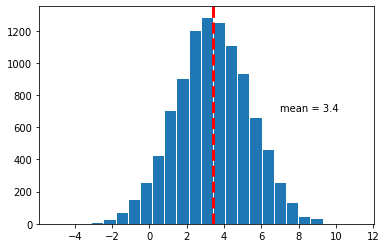

In [2]:
# we'll now learn how to do this using the scipy.stats module in python
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# this is the mean
mu = 3.4

# this is the variance
sigsquared = 4

# we will evaluate the density by plugging in each value of x below
x = [0.1, 1, 2, 10.4]

# note that the norm object we just imported contains the same function
# that Normal() contains, as written in the markup cell above
# this function is used with the .pdf() call
# two ways you can do this that are equivalent:
wayOne = norm.pdf(x, loc=mu, scale=np.sqrt(sigsquared))

# uncomment these blelow
#print("first way: ", wayOne)

# or you can create the object first:
wayTwo = norm(loc=mu, scale=np.sqrt(sigsquared))
#print("second way: ", wayTwo.pdf(x))

# can you tell us the difference between these two, what does it mean in terms of 
# what variables are available in the scope of your program?

# sampling values from a normal distribution
normDistributed = norm(loc=mu, scale=np.sqrt(sigsquared)).rvs(10000)

# we can visualize these samples with a histogram. With enough samples we start to get an
# idea of what the true form of the distribution is (e.g. we get a sense for the mean and standard deviation)
plt.hist(normDistributed, edgecolor="white", bins=25);
plt.axvline(mu, color="red", linestyle="--", lw=3)
plt.annotate(xy=(7, 700), s=f"mean = {mu}");

The mean, $\mu$, of a Gaussian distribution is sometimes referred to as the "location" parameter. Intuitively you can think of it, in the univariate case, as the point on the real number line that the shape of the distribution is centered on. The standard deviation, $\sigma$ ,(recall that standard deviation is the square root of the variance) is sometimes referred to as the "scale" parameter. It will determine how much values spread out away from the peak.

<ipython-input-2-e90812246a78>:17: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  val.annotate(xy=(params[idx][0] + 2*params[idx][1], 800), s=params[idx])


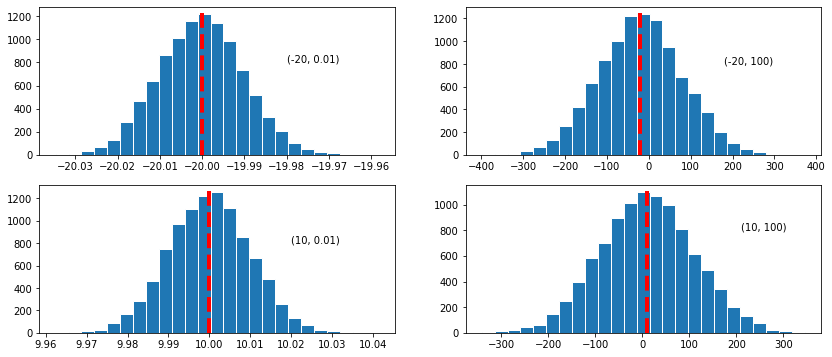

In [2]:
mus = [-20, 10]
sig2s = [0.01, 100]
nvals = 10000

# what happens if we randomly sample values, as above from Gaussian distribution defined by the following: 

params = [(x, y) for x in mus for y in sig2s]
empDists = [norm(*p).rvs(nvals) for p in params]

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(14, 6))

# plotting each of them to see where their means fall, and how far
# from the mean other values sampled from the same distribution are
for idx, val in enumerate(ax.flatten()):
    val.hist(empDists[idx], edgecolor="white", bins=25)
    val.axvline(params[idx][0], color="red", linestyle="--", lw=4)
    val.annotate(xy=(params[idx][0] + 2*params[idx][1], 800), s=params[idx])

## Random variable Gaussian continued:

Let's imagine that we have the random variable: "location of a mouse in a linear track".
We're going to assume that this random variable has a Gaussian distribution. With this we're abstracting properities of the animal's behavior. We imagine that the mouse really likes to be a the center of the linear track, which we map onto the value 0, and that it's usually there but deviates a bit. This allows to summarize the animals behavior on the linear track as a Gaussian with mean 0 and variance 0.2 (the selection of 0.2 is arbitrary)

$$P(x; 0, 0.2) = Normal(x; 0, 0.2)$$

<div>
<img src="images/mouse_track.png" width="500"/>
</div>

what we're going to do is sample some location values around zero, and compute the proability density of these location values. In this case, it's all simulated but in the real world, we'd be making an assumption about the behavior of the animal following a Gaussian distribution with particular values for it's parameters. If this distribution did in fact summarize the location of the mouse, then when we evaluate the Gaussian pdf at locations around the one we assume, that should have the largest value for the pdf.

<ipython-input-68-c768f259e1da>:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  plt.plot(rvs[sidx], prob_dens[[sidx]], lw=3);


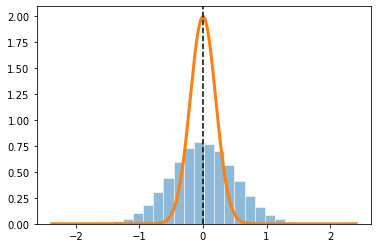

In [68]:
np.random.seed(1453) # for reproducibility
# parameters for a Gaussian
true_mean, true_var = 0, 0.2
# create a function of the distribution with those two parameters
norm_fn = norm(true_mean, true_var)
# sample some random values from the function
rvs =  norm(0,0.5).rvs(50000) # lets say the samples don't quite match all of our assumptions
# compute the probability density of those random values
prob_dens = norm_fn.pdf(rvs)
# get a sorted index for plotting
sidx = np.argsort(rvs)

plt.hist(rvs, alpha=0.5, density=True, edgecolor="white", bins=30);
plt.plot(rvs[sidx], prob_dens[[sidx]], lw=3);
plt.axvline(true_mean,linestyle="--",color="black")

## Discrete case: A Bernoulli distribution

Unlike the Gaussian, Bernoullis are discrete distributions. Oftentimes you'll see it conceptualized as a coin flip. This is because the Bernoulli can only take on two values: 1 and 0. It takes on the value 1 with some probability: $ 0 \leq p \leq 1$ and the value 0 with probabiilty $1 - p$. If we have a fair coin, this means $p = heads = 0.5$ and $1 - p = tails = 0.5$

Because a Bernoulli is discrete, instead of a probability density function it has a probability mass function. It's form is:

$$p^x(1-p)^{1-x}$$

where above $x$ is a placeholder for the outcome (1 or 0, heads or tails).

What happens to the above function when $x = 0$ ? What about when $x = 1$ ?

A Bernoulli distribution (and infact many distributions if not all) can actually be written down in a different way, note that: 

$$p^x(1 - p)^{1- x} = px + (1-p)(1-x)$$

The different ways of writing down a distribution can be useful for different things. For example, if you're computing some integral with a Bernoulli function involved, then the second way of writing down the Bernoulli might be more helpful. However if you're computing log-probabilities, then the first way might more conveinent.

In [4]:
from scipy.stats import bernoulli

# create a variable of the bernoulli distribtion with p = 0.3


# use what you've learned above to sample random values from a Bernoulli distribution


# as above, plot the samples of the bernoulli in a histogram (what do you expect to see here?)

## A Binomial distribution

A Binomial distribution is similar to a Bernoulli. We can think of it as a "generalized" Bernoulli because for a certain choice of parameter values of the Binomial, we get a distribution that is equivalent to a Bernoulli with those parameter values. Just like a Bernoulli, a Binomial is a discrete distribution and so its probability mass function has the form:

$$\frac{n!}{x!(n-x)!} p^x(1-p)^{(n-x)}$$

notice that if $n = 1$, the above formula becomes the same as that for a Bernoulli distribution. As we can see a Binomial has two parameters, $n$, this can take on any value in the set of natural numbers (e.g. 0, 1, 2, 3...). and $p$, this is the same as the Bernoulli case, a number between 0 and 1 (or equal to one of those extremes).

A Binomial distribution with parameters $n$ and $p$ is defined as a distribution for a random variable of the number of sucesses in a sequences of $n$ in dependent experiments, each having probability $p$ of sucess. For example, you have a fair coin with $p = 0.5$, telling us that heads and tails are equally likely. If we want to compute the probability mass function of 3 heads in 10 tosses of the coin, then we'd evaluate this function: 

$$P(x|n, p) = Binomial(x|n, p) = \frac{10!}{3!(10 - 3)!} 0.5^3(1 - 0.5)^{10 - 3}$$

In [8]:
# import the binomial distribution from scipy

n = 10 # 10 total tosses
p = 0.3 # probability of success

# randomly sample form a Binomial with these parameters

# What do you expect this plot to look like?

# plot the resulting samples with plt.hist()

## A Beta distribution

A Beta distribution is often called "a distribution over probabilities", this is because if we sample values from a Beta distribution they will always be between 0 and 1, just like probabilities. A Beta distribution is a continuous distribution 

Why is a Beta distribution a continuous distribution?

This family of distributions is defined by the two parameters: $\alpha$, $\beta$ and the function of the form: 

$$P(p; \alpha, \beta) = Beta(p; \alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)} p^{\alpha - 1}(1-p)^{\beta -1 }$$

Here $0 \leq p \leq 1$. The parameters $\alpha$ and $\beta$ are called shape parameters because they control the shape of the density as you vary them. Lets see this below:

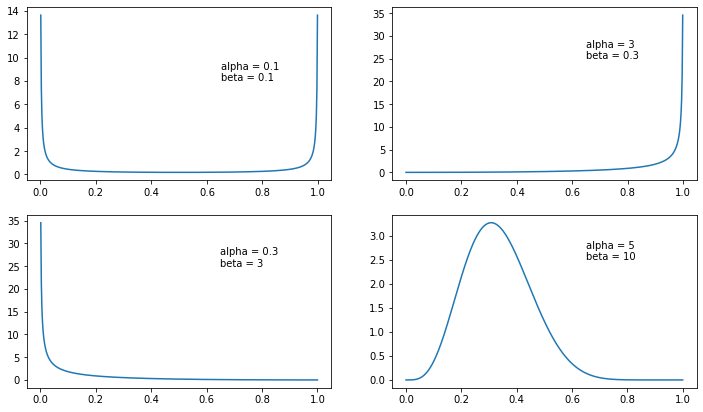

In [9]:
from scipy.stats import beta
alpha_beta = [(0.1, 0.1), (3, 0.3), (0.3, 3), (5, 10)]
betaDists = [beta(*ab) for ab in alpha_beta]
yannots = [8, 25, 25, 2.5]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (12, 7))
x_axis = np.linspace(start=0, stop=1, num=500)

for idx, obj in enumerate(ax.flatten()):
    alpha, beta = alpha_beta[idx]
    obj.plot(x_axis, betaDists[idx].pdf(x_axis))
    obj.annotate(xy=(0.65, yannots[idx]), s=f"alpha = {alpha}\nbeta = {beta}")

In [ ]:
# use what you've done above to do a few things:

# 1. import the Beta distribution from scipy

# 2. evaluate the density function for any value of p

# 3. sample values from the function, after assinging any values of alpha and beta you'd like
# there are some restrictions on alpha and beta, what are they?